In [29]:
import numpy as np
from PIL import Image
from itertools import product, combinations


In [36]:
t1 = np.pi/15
t2 = -np.pi/9
t3 = -np.pi/20

Rx = np.array([[1, 0, 0],
    [0, np.cos(t1), -np.sin(t1)],
    [0, np.sin(t1), np.cos(t1)]])

Ry = np.array([[np.cos(t2), 0, np.sin(t2)],
    [0, 1, 0],
    [-np.sin(t2), 0, np.cos(t2)]])

Rz = np.array([[np.cos(t3), -np.sin(t3), 0],
    [np.sin(t3), np.cos(t3), 0],
    [0, 0, 1]])

Sigma = np.diag([3, 1, 0.5])
R = Rz@Ry@Rx@Sigma


In [31]:
r = [-1, 1]
for i in product(r, r, r):
    print(i)

(-1, -1, -1)
(-1, -1, 1)
(-1, 1, -1)
(-1, 1, 1)
(1, -1, -1)
(1, -1, 1)
(1, 1, -1)
(1, 1, 1)


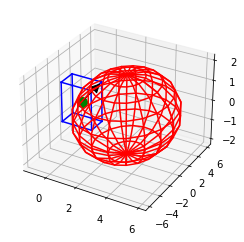

In [35]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

# draw cube
r = [-1, 1]
for s, e in combinations(np.array(list(product(r, r, r))), 2):
    if np.sum(np.abs(s-e)) == r[1]-r[0]:
        ax.plot3D(*zip(s, e), color="b")

# draw sphere
u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
x = 3+ 3* np.cos(u)*np.sin(v)
y = 6* np.sin(u)*np.sin(v)
z = 2*np.cos(v)
ax.plot_wireframe(x, y, z, color="r")

# draw a point
ax.scatter([0], [0], [0], color="g", s=100)

# draw a vector
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d


class Arrow3D(FancyArrowPatch):

    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        return np.min(zs)

a = Arrow3D([0, 1], [0, 1], [0, 1], mutation_scale=20,
            lw=1, arrowstyle="-|>", color="black")
ax.add_artist(a)
plt.show()
